# Import the necessary libraries

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import *
from keras.utils import np_utils
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import resample
from tensorflow.keras import initializers
from tensorflow.keras import optimizers
from tensorflow.keras.optimizers import SGD
from collections import Counter
from matplotlib import pyplot
from numpy import where
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from keras.constraints import maxnorm
from pandas_profiling import ProfileReport

from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [38]:
primary_df = pd.read_csv('./sepsis_survival_primary_cohort.csv')
test_df = pd.read_csv('./sepsis_survival_study_cohort.csv')
val_df = pd.read_csv('./sepsis_survival_validation_cohort.csv')

In [39]:
primary_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110204 entries, 0 to 110203
Data columns (total 4 columns):
 #   Column                         Non-Null Count   Dtype
---  ------                         --------------   -----
 0   age_years                      110204 non-null  int64
 1   sex_0male_1female              110204 non-null  int64
 2   episode_number                 110204 non-null  int64
 3   hospital_outcome_1alive_0dead  110204 non-null  int64
dtypes: int64(4)
memory usage: 3.4 MB


In [40]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19051 entries, 0 to 19050
Data columns (total 4 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   age_years                      19051 non-null  int64
 1   sex_0male_1female              19051 non-null  int64
 2   episode_number                 19051 non-null  int64
 3   hospital_outcome_1alive_0dead  19051 non-null  int64
dtypes: int64(4)
memory usage: 595.5 KB


In [41]:
val_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 4 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   age_years                      137 non-null    int64
 1   sex_0male_1female              137 non-null    int64
 2   episode_number                 137 non-null    int64
 3   hospital_outcome_1alive_0dead  137 non-null    int64
dtypes: int64(4)
memory usage: 4.4 KB


In [42]:
#concatenating the 3 data frames together
primary_df = pd.concat([primary_df, test_df,val_df ], axis=0)
primary_df = primary_df.reset_index()

In [43]:
primary_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129392 entries, 0 to 129391
Data columns (total 5 columns):
 #   Column                         Non-Null Count   Dtype
---  ------                         --------------   -----
 0   index                          129392 non-null  int64
 1   age_years                      129392 non-null  int64
 2   sex_0male_1female              129392 non-null  int64
 3   episode_number                 129392 non-null  int64
 4   hospital_outcome_1alive_0dead  129392 non-null  int64
dtypes: int64(5)
memory usage: 4.9 MB


In [44]:
del primary_df['index']

# Initial Exploratory Data Analysis



In [45]:
primary_df.head(3)

,age_years,sex_0male_1female,episode_number,hospital_outcome_1alive_0dead
0,21,1,1,1
1,20,1,1,1
2,21,1,1,1


In [46]:
len(primary_df[primary_df['hospital_outcome_1alive_0dead']==1])

117657

In [47]:
len(primary_df[primary_df['hospital_outcome_1alive_0dead']==0])

11735

In [48]:
primary_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129392 entries, 0 to 129391
Data columns (total 4 columns):
 #   Column                         Non-Null Count   Dtype
---  ------                         --------------   -----
 0   age_years                      129392 non-null  int64
 1   sex_0male_1female              129392 non-null  int64
 2   episode_number                 129392 non-null  int64
 3   hospital_outcome_1alive_0dead  129392 non-null  int64
dtypes: int64(4)
memory usage: 3.9 MB


In [49]:
primary_df.isnull().sum()

age_years                        0
sex_0male_1female                0
episode_number                   0
hospital_outcome_1alive_0dead    0
dtype: int64

### I am going to check to see the distribution of hospital outcome to see the number of dead and alive

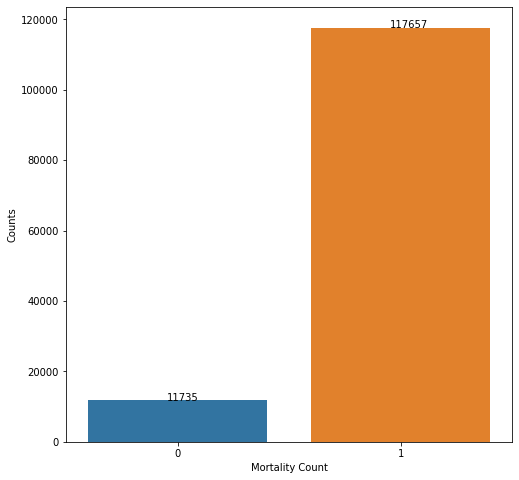

In [50]:
plt.figure(figsize= (8,8))
episodes = sns.countplot(primary_df['hospital_outcome_1alive_0dead'])
plt.xlabel('Mortality Count')
plt.ylabel('Counts')
for p in episodes.patches:
   episodes.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.35, p.get_height()+0.05))
plt.show()

In [51]:
#this tells us that this  there will be an uneven balanced set and there is a high chance of overfitting


### checking the distribution sepsis by Number of episodes

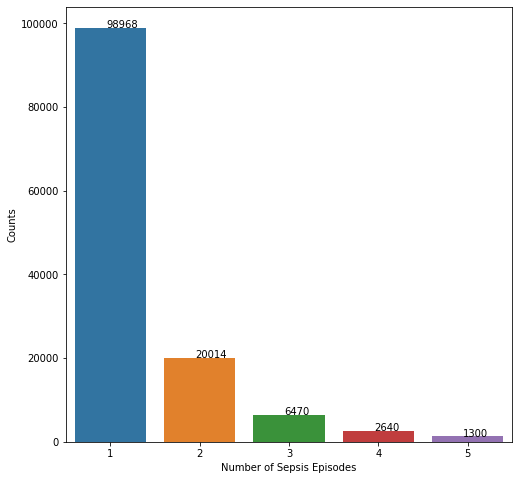

In [52]:
plt.figure(figsize= (8,8))
episodes = sns.countplot(primary_df['episode_number'])
plt.xlabel('Number of Sepsis Episodes')
plt.ylabel('Counts')
for p in episodes.patches:
   episodes.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.35, p.get_height()+0.05))
plt.show()

### checking for correlations

In [53]:
corrs = primary_df.corr()
corrs

,age_years,sex_0male_1female,episode_number,hospital_outcome_1alive_0dead
age_years,1.000000,-0.014777,0.024309,-0.175198
sex_0male_1female,-0.014777,1.000000,-0.040984,0.021047
episode_number,0.024309,-0.040984,1.000000,-0.003963
hospital_outcome_1alive_0dead,-0.175198,0.021047,-0.003963,1.000000


In [54]:
# there is very little correlations amongst variables which is a good thing for the model to make it difficult for learning and optimisation

<AxesSubplot:>

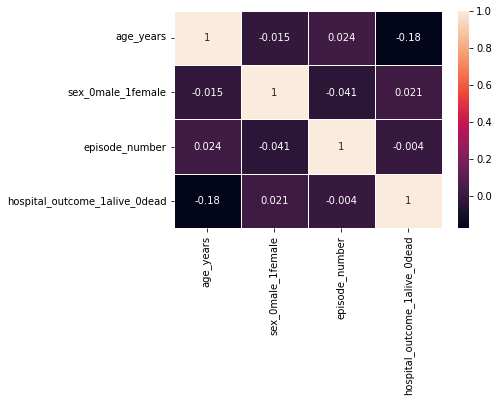

In [55]:
sns.heatmap(corrs, linewidth = 1, annot = True)

### we build an age pyramid

In [56]:
# Creating an age pyramid

def age_group(age): # function to create Age Groups
    if age <= 4:
        return "0-4"
    elif age <= 9:
        return  "5-9"
    elif age <=14:
        return "10-14"
    elif age <19:
        return "15-19"
    elif age <=24:
        return "20-24"
    elif age <=29:
        return "25-29"
    elif age <=34:
        return "30-34"
    elif age <= 39:
        return "35-39"
    elif age <=44:
        return "40-44"
    elif age <=49:
        return "45-49"
    elif age <= 54:
        return "50-54"
    elif age <=59:
        return "55-59"
    elif age <=64:
        return "60-64"
    elif age <= 69:
        return "65-69"
    elif age <=74:
        return "70-74"
    elif age<=79:
        return "75-79"
    elif age <= 84:
        return "80-84"
    elif age <=89:
        return "85-89"
    elif age <=94:
        return "90-94"
    elif age <=99:
        return "95-99"
    elif age > 99:
        return "100+"

In [57]:
primary_df['Age Group']= primary_df['age_years'].apply(age_group)

In [58]:
female =primary_df[primary_df['sex_0male_1female']== 1]

In [59]:
male = primary_df[primary_df['sex_0male_1female']== 0]

In [60]:
f= female['Age Group'].value_counts() 

In [61]:

m= male['Age Group'].value_counts() 

In [62]:
m

80-84    8726
75-79    7647
65-69    7543
85-89    7175
70-74    7001
60-64    5765
55-59    3966
90-94    3486
50-54    3005
0-4      2733
45-49    2343
40-44    2094
35-39    1562
30-34    1165
20-24    1137
25-29     983
15-19     616
5-9       580
95-99     536
10-14     457
100+       48
Name: Age Group, dtype: int64

In [63]:
m.index

Index(['80-84', '75-79', '65-69', '85-89', '70-74', '60-64', '55-59', '90-94',
       '50-54', '0-4', '45-49', '40-44', '35-39', '30-34', '20-24', '25-29',
       '15-19', '5-9', '95-99', '10-14', '100+'],
      dtype='object')

In [64]:
m.values

array([8726, 7647, 7543, 7175, 7001, 5765, 3966, 3486, 3005, 2733, 2343,
       2094, 1562, 1165, 1137,  983,  616,  580,  536,  457,   48],
      dtype=int64)

In [65]:
f.index

Index(['85-89', '80-84', '75-79', '65-69', '70-74', '90-94', '60-64', '55-59',
       '50-54', '0-4', '45-49', '40-44', '35-39', '20-24', '30-34', '25-29',
       '95-99', '15-19', '5-9', '10-14', '100+'],
      dtype='object')

In [66]:
f.values

array([7268, 7248, 5490, 5284, 5127, 4675, 4050, 3260, 2468, 2408, 2006,
       1869, 1737, 1693, 1547, 1478, 1131,  790,  701,  461,  133],
      dtype=int64)

In [67]:
m= m*-1

In [68]:
age_Class=['100+','95-99', '90-94','85-89','80-84','75-79','70-74','65-69','60-64','55-59', '50-54', '45-49','40-44','35-39','30-34','25-29', '20-24', '15-19','10-14','5-9','0-4' ]

Text(0.5, 1.0, 'Age Pyramid')

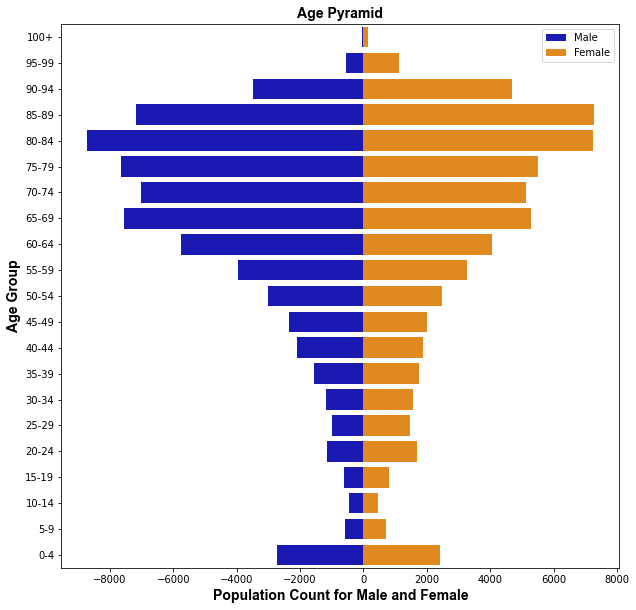

In [69]:
font = {'family': 'Arial',
        'color':  'black',
        'weight': 'semibold',
        'size': 14,
        }
plt.figure(figsize= (10,10))
age_pyramid = sns.barplot(x= m.values, y= m.index, order= age_Class, color= ('mediumblue'), label = 'Male')
age_pyramid = sns.barplot(x= f.values, y = f.index, order= age_Class, color = ('darkorange'), label = 'Female')
plt.xlabel('Population Count for Male and Female', fontdict = font)
plt.ylabel('Age Group', fontdict = font)
age_pyramid.legend()
plt.title('Age Pyramid', fontdict = font)

In [70]:
did_not_survive = primary_df[primary_df['hospital_outcome_1alive_0dead']==0] # we want ot check the distribution of non- survivors across different age groups

In [71]:
did_not_survive

,age_years,sex_0male_1female,episode_number,hospital_outcome_1alive_0dead,Age Group
16,72,0,1,0,70-74
45,63,0,1,0,60-64
49,89,1,2,0,85-89
61,80,0,3,0,80-84
64,62,1,3,0,60-64
...,...,...,...,...,...
129379,71,0,1,0,70-74
129381,69,0,1,0,65-69
129385,50,0,1,0,50-54
129388,50,0,1,0,50-54


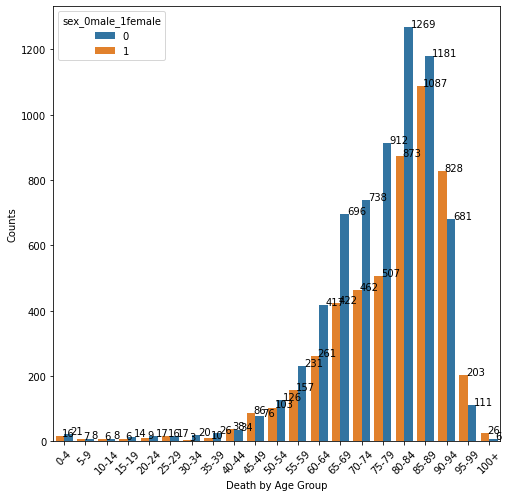

In [72]:
plt.figure(figsize= (8,8))
episodes = sns.countplot(did_not_survive['Age Group'],  hue = did_not_survive['sex_0male_1female'], order= age_Class)
plt.xlabel('Death by Age Group')
plt.ylabel('Counts')
for p in episodes.patches:
   episodes.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.10, p.get_height()+0.05))
plt.gca().invert_xaxis()
plt.xticks(rotation = 45)
plt.show()



# Data Preprocessing

#### # Split the data to input and output variables and then convert the data to np.array

In [73]:
x =np.array(primary_df[['age_years','sex_0male_1female','episode_number']])
y =np.array( primary_df[['hospital_outcome_1alive_0dead']])

In [74]:
x

array([[21,  1,  1],
       [20,  1,  1],
       [21,  1,  1],
       ...,
       [62,  0,  1],
       [58,  0,  1],
       [55,  1,  1]], dtype=int64)

In [75]:
y

array([[1],
       [1],
       [1],
       ...,
       [1],
       [0],
       [1]], dtype=int64)

#### Rescale the data to the bounds of the activation function (sigmoid) I am going to use

In [76]:
scaler = MinMaxScaler(feature_range=(0, 1))

In [77]:
X = scaler.fit_transform(x)
X

array([[0.21, 1.  , 0.  ],
       [0.2 , 1.  , 0.  ],
       [0.21, 1.  , 0.  ],
       ...,
       [0.62, 0.  , 0.  ],
       [0.58, 0.  , 0.  ],
       [0.55, 1.  , 0.  ]])

# We then work on building our initial baseline model

In [43]:
model = Sequential()
model.add(Dense(units= 3, activation='relu', input_shape=(3,)))

model.add(Dense(1, activation='sigmoid'))

In [44]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3)                 12        
                                                                 
 dense_1 (Dense)             (None, 1)                 4         
                                                                 
Total params: 16
Trainable params: 16
Non-trainable params: 0
_________________________________________________________________


In [45]:
model.compile(loss='binary_crossentropy',
 optimizer='adam',
 metrics=['accuracy'])

# We then split our data

In [46]:

x_train, x_test, y_train, y_test = train_test_split(X, y, shuffle= True, test_size=0.20, random_state=42)

In [47]:
%%time
history = model.fit(x_train, y_train,
                    batch_size = 128,
                    epochs= 20,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=1)

Epoch 1/20
809/809 [==============================] - 3s 3ms/step - loss: 0.5628 - accuracy: 0.9074 - val_loss: 0.4625 - val_accuracy: 0.9096
Epoch 2/20
809/809 [==============================] - 2s 2ms/step - loss: 0.4066 - accuracy: 0.9092 - val_loss: 0.3640 - val_accuracy: 0.9096
Epoch 3/20
809/809 [==============================] - 2s 2ms/step - loss: 0.3413 - accuracy: 0.9092 - val_loss: 0.3238 - val_accuracy: 0.9096
Epoch 4/20
809/809 [==============================] - 2s 2ms/step - loss: 0.3158 - accuracy: 0.9092 - val_loss: 0.3091 - val_accuracy: 0.9096
Epoch 5/20
809/809 [==============================] - 2s 2ms/step - loss: 0.3071 - accuracy: 0.9092 - val_loss: 0.3046 - val_accuracy: 0.9096
Epoch 6/20
809/809 [==============================] - 2s 2ms/step - loss: 0.3047 - accuracy: 0.9092 - val_loss: 0.3036 - val_accuracy: 0.9096
Epoch 7/20
809/809 [==============================] - 2s 2ms/step - loss: 0.3043 - accuracy: 0.9092 - val_loss: 0.3035 - val_accuracy: 0.9096
Epoch 

In [48]:
# model started at a high accuracy but failed to improve, strongly denoting that it did not learn much
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.303511381149292
Test accuracy: 0.9095792174339294


In [49]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = 20

epochs_range = range(epochs)

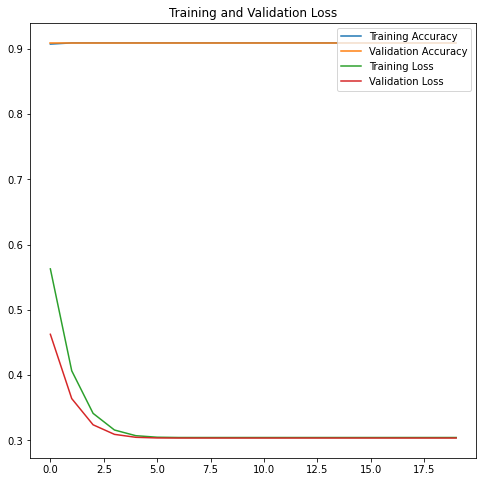

In [50]:
%matplotlib inline
plt.figure(figsize=(8, 8))
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='upper left')
plt.title('Training and Validation Accuracy')

plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.savefig("initial_model.pdf", dpi=100)
plt.show()

In [51]:
prediction_test = model.predict(x_test)
prediction_test = np.rint(prediction_test)
prediction_test

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]], dtype=float32)

In [52]:
print(classification_report(y_test, prediction_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2340
           1       0.91      1.00      0.95     23539

    accuracy                           0.91     25879
   macro avg       0.45      0.50      0.48     25879
weighted avg       0.83      0.91      0.87     25879



In [53]:
confusion_matrix(y_test, prediction_test ) # unfortunately model did not learn anything!

array([[    0,  2340],
       [    0, 23539]], dtype=int64)

In [54]:
model.save('./unbalanced.h5')

# Data Augumentation using SMOTE method


In [78]:
print("Before OverSampling, counts of label '1': {}".format(sum(y == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y == 0)))

Before OverSampling, counts of label '1': [117657]
Before OverSampling, counts of label '0': [11735] 



In [79]:
from collections import Counter
from sklearn.svm import LinearSVC
from imblearn.pipeline import make_pipeline
from imblearn.base import BaseSampler
from imblearn.over_sampling import (SMOTE, RandomOverSampler)
#!pip install imbalanced-learn
import imblearn
from imblearn.over_sampling import SMOTE

In [80]:
smeen = SMOTE(random_state= 2)

In [81]:
Xtrain_een, ytrain_een = smeen.fit_resample(X, y,)

In [82]:
print('After OverSampling, the shape of train_X: {}'.format(Xtrain_een.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(ytrain_een.shape))

After OverSampling, the shape of train_X: (235314, 3)
After OverSampling, the shape of train_y: (235314,) 



In [60]:
print("Before OverSampling, counts of label '1': {}".format(sum(ytrain_een == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(ytrain_een == 0)))

Before OverSampling, counts of label '1': 117657
Before OverSampling, counts of label '0': 117657 



In [61]:
#### Test on the same model again

In [62]:
model = Sequential()
model.add(Dense(units= 3, activation='relu', input_shape=(3,)))

model.add(Dense(1, activation='sigmoid'))

In [63]:
model.compile(loss='binary_crossentropy',
 optimizer='adam',
 metrics=['accuracy'])

In [64]:
#### split the data again

In [65]:
xx_train, xx_test, yy_train, yy_test = train_test_split(Xtrain_een, ytrain_een, shuffle= True, test_size=0.20, random_state=42)

In [66]:
%%time
history = model.fit(xx_train, yy_train,
                    batch_size = 128,
                    epochs= 20,
                    verbose=1,
                    validation_data=(xx_test, yy_test))
score = model.evaluate(xx_test, yy_test, verbose=1)

Epoch 1/20
1471/1471 [==============================] - 3s 2ms/step - loss: 0.6690 - accuracy: 0.6046 - val_loss: 0.6499 - val_accuracy: 0.6359
Epoch 2/20
1471/1471 [==============================] - 3s 2ms/step - loss: 0.6411 - accuracy: 0.6355 - val_loss: 0.6314 - val_accuracy: 0.6423
Epoch 3/20
1471/1471 [==============================] - 3s 2ms/step - loss: 0.6313 - accuracy: 0.6368 - val_loss: 0.6261 - val_accuracy: 0.6445
Epoch 4/20
1471/1471 [==============================] - 3s 2ms/step - loss: 0.6287 - accuracy: 0.6361 - val_loss: 0.6252 - val_accuracy: 0.6403
Epoch 5/20
1471/1471 [==============================] - 3s 2ms/step - loss: 0.6278 - accuracy: 0.6360 - val_loss: 0.6240 - val_accuracy: 0.6435
Epoch 6/20
1471/1471 [==============================] - 3s 2ms/step - loss: 0.6273 - accuracy: 0.6357 - val_loss: 0.6235 - val_accuracy: 0.6449
Epoch 7/20
1471/1471 [==============================] - 3s 2ms/step - loss: 0.6271 - accuracy: 0.6356 - val_loss: 0.6242 - val_accuracy:

In [67]:
# model started at a high accuracy but failed improve, strongly denoting that it did not learn much
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.6226463317871094
Test accuracy: 0.6427767276763916


In [68]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = 20

epochs_range = range(epochs)

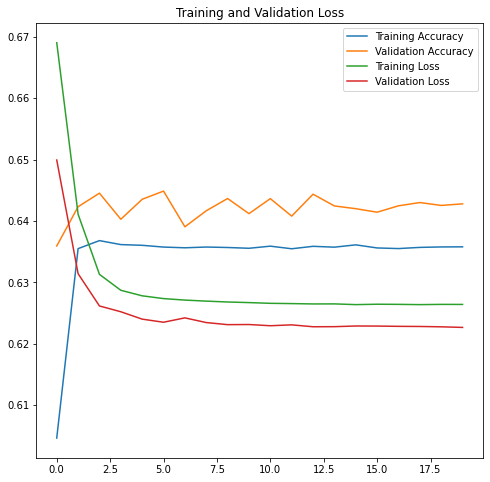

In [69]:
plt.figure(figsize=(8, 8))
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='upper left')
plt.title('Training and Validation Accuracy')

plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.savefig("plot after smote.pdf", dpi=100)
plt.show()

In [70]:
prediction_test = model.predict(xx_test)
prediction_test = np.rint(prediction_test)
prediction_test

array([[0.],
       [1.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32)

In [71]:
print(classification_report(yy_test, prediction_test))

              precision    recall  f1-score   support

           0       0.63      0.72      0.67     23686
           1       0.67      0.56      0.61     23377

    accuracy                           0.64     47063
   macro avg       0.65      0.64      0.64     47063
weighted avg       0.65      0.64      0.64     47063



In [72]:
confusion_matrix(yy_test, prediction_test ) # there is improvement as seen on the output of the confusion matrix

array([[17118,  6568],
       [10244, 13133]], dtype=int64)

In [73]:
model.save('./smote_model.h5')

### lets experiment with a label binarizer
### convert the labels from integers to vectors


In [75]:
model = Sequential()
model.add(Dense(units= 3, activation='relu', input_shape=(3,)))

model.add(Dense(1, activation='sigmoid'))

In [76]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 3)                 12        
                                                                 
 dense_5 (Dense)             (None, 1)                 4         
                                                                 
Total params: 16
Trainable params: 16
Non-trainable params: 0
_________________________________________________________________


In [77]:
larning_rate = 0.01
epoch = 20
momentums = 0.8

model.compile(loss='binary_crossentropy',
 optimizer='adam',
 metrics=['accuracy'])

In [78]:
xx_train, xx_test, yy_train, yy_test = train_test_split(Xtrain_een, ytrain_een, shuffle= True, test_size=0.20, random_state=42)

In [79]:
lb = LabelBinarizer()
trainYb = lb.fit_transform(yy_train)
testYb = lb.transform(yy_test)

In [80]:
%%time
history = model.fit(xx_train, trainYb,
                    batch_size = 128,
                    epochs= epoch,
                    verbose=1,
                    validation_data=(xx_test, testYb))
score = model.evaluate(xx_test,testYb, verbose=1)

Epoch 1/20
1471/1471 [==============================] - 4s 2ms/step - loss: 0.6852 - accuracy: 0.5503 - val_loss: 0.6660 - val_accuracy: 0.6252
Epoch 2/20
1471/1471 [==============================] - 3s 2ms/step - loss: 0.6500 - accuracy: 0.6311 - val_loss: 0.6354 - val_accuracy: 0.6421
Epoch 3/20
1471/1471 [==============================] - 3s 2ms/step - loss: 0.6316 - accuracy: 0.6374 - val_loss: 0.6254 - val_accuracy: 0.6439
Epoch 4/20
1471/1471 [==============================] - 3s 2ms/step - loss: 0.6277 - accuracy: 0.6366 - val_loss: 0.6237 - val_accuracy: 0.6437
Epoch 5/20
1471/1471 [==============================] - 3s 2ms/step - loss: 0.6270 - accuracy: 0.6365 - val_loss: 0.6232 - val_accuracy: 0.6442
Epoch 6/20
1471/1471 [==============================] - 3s 2ms/step - loss: 0.6269 - accuracy: 0.6363 - val_loss: 0.6233 - val_accuracy: 0.6417
Epoch 7/20
1471/1471 [==============================] - 3s 2ms/step - loss: 0.6268 - accuracy: 0.6363 - val_loss: 0.6231 - val_accuracy:

In [81]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.6229113936424255
Test accuracy: 0.6440728306770325


In [82]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = 20

epochs_range = range(epochs)

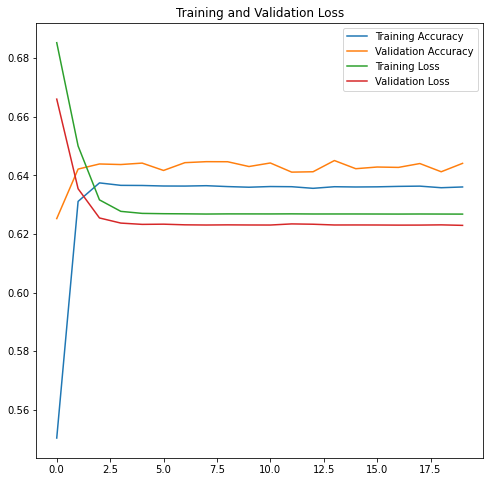

In [83]:
plt.figure(figsize=(8, 8))
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='upper left')
plt.title('Training and Validation Accuracy')

plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.savefig("plot after smote.pdf", dpi=100)
plt.show()

In [84]:
prediction_test = model.predict(xx_test)
prediction_test = np.rint(prediction_test)
prediction_test

array([[0.],
       [1.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32)

In [85]:
print(classification_report(testYb, prediction_test))

              precision    recall  f1-score   support

           0       0.62      0.74      0.68     23686
           1       0.67      0.55      0.61     23377

    accuracy                           0.64     47063
   macro avg       0.65      0.64      0.64     47063
weighted avg       0.65      0.64      0.64     47063



In [86]:
model.save('./binarizer.h5')

### We experiment using SGD to test using 30% and 20% respectively to try and harmonize the test znd training accuracy

In [88]:
model = Sequential()
model.add(Dense(units= 3, activation='relu', input_shape=(3,)))


model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 3)                 12        
                                                                 
 dense_7 (Dense)             (None, 1)                 4         
                                                                 
Total params: 16
Trainable params: 16
Non-trainable params: 0
_________________________________________________________________


In [89]:
model.compile(loss='binary_crossentropy',
 optimizer='SGD',
 metrics=['accuracy'])

In [90]:
xx_train, xx_test, yy_train, yy_test = train_test_split(Xtrain_een, ytrain_een, shuffle= True, test_size=0.30, random_state=42)

In [91]:
%%time
history = model.fit(xx_train, yy_train,
                    batch_size = 128,
                    epochs= 20,
                    verbose=1,
                    validation_data=(xx_test, yy_test))
score = model.evaluate(xx_test, yy_test, verbose=1)

Epoch 1/20
1287/1287 [==============================] - 4s 2ms/step - loss: 0.6881 - accuracy: 0.5717 - val_loss: 0.6727 - val_accuracy: 0.6030
Epoch 2/20
1287/1287 [==============================] - 3s 2ms/step - loss: 0.6679 - accuracy: 0.6091 - val_loss: 0.6621 - val_accuracy: 0.6188
Epoch 3/20
1287/1287 [==============================] - 3s 3ms/step - loss: 0.6587 - accuracy: 0.6192 - val_loss: 0.6542 - val_accuracy: 0.6232
Epoch 4/20
1287/1287 [==============================] - 3s 3ms/step - loss: 0.6513 - accuracy: 0.6237 - val_loss: 0.6474 - val_accuracy: 0.6278
Epoch 5/20
1287/1287 [==============================] - 3s 2ms/step - loss: 0.6450 - accuracy: 0.6288 - val_loss: 0.6413 - val_accuracy: 0.6320
Epoch 6/20
1287/1287 [==============================] - 4s 3ms/step - loss: 0.6397 - accuracy: 0.6333 - val_loss: 0.6365 - val_accuracy: 0.6365
Epoch 7/20
1287/1287 [==============================] - 3s 2ms/step - loss: 0.6356 - accuracy: 0.6354 - val_loss: 0.6330 - val_accuracy:

In [92]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.6252886652946472
Test accuracy: 0.6399886608123779


In [93]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = 20

epochs_range = range(epochs)

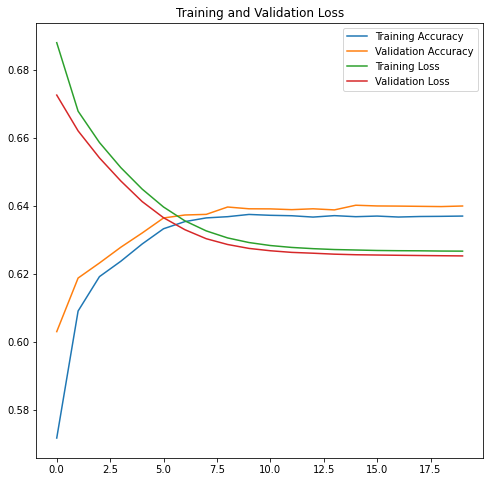

In [94]:
plt.figure(figsize=(8, 8))
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='upper left')
plt.title('Training and Validation Accuracy')

plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.savefig("plot after smote.pdf", dpi=100)
plt.show()

In [95]:
prediction_test = model.predict(xx_test)
prediction_test = np.rint(prediction_test)
prediction_test

array([[0.],
       [1.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32)

In [96]:
print(classification_report(yy_test, prediction_test))

              precision    recall  f1-score   support

           0       0.62      0.74      0.67     35423
           1       0.67      0.54      0.60     35172

    accuracy                           0.64     70595
   macro avg       0.65      0.64      0.64     70595
weighted avg       0.64      0.64      0.64     70595



In [97]:
confusion_matrix(yy_test, prediction_test )

array([[26064,  9359],
       [16056, 19116]], dtype=int64)

In [98]:
model.save('./SGD30.h5')

In [99]:
model = Sequential() # we  experiment using SGD the same exact model but change the test size to 20
model.add(Dense(units= 3, activation='relu', input_shape=(3,)))


model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 3)                 12        
                                                                 
 dense_9 (Dense)             (None, 1)                 4         
                                                                 
Total params: 16
Trainable params: 16
Non-trainable params: 0
_________________________________________________________________


In [100]:
model.compile(loss='binary_crossentropy',
 optimizer='SGD',
 metrics=['accuracy'])

In [101]:
xx_train, xx_test, yy_train, yy_test = train_test_split(Xtrain_een, ytrain_een, shuffle= True, test_size=0.20, random_state=42)

In [102]:
%%time
history = model.fit(xx_train, yy_train,
                    batch_size = 128,
                    epochs= 20,
                    verbose=1,
                    validation_data=(xx_test, yy_test))
score = model.evaluate(xx_test, yy_test, verbose=1)

Epoch 1/20
1471/1471 [==============================] - 5s 3ms/step - loss: 0.6823 - accuracy: 0.5838 - val_loss: 0.6769 - val_accuracy: 0.6031
Epoch 2/20
1471/1471 [==============================] - 2s 2ms/step - loss: 0.6724 - accuracy: 0.6084 - val_loss: 0.6664 - val_accuracy: 0.6186
Epoch 3/20
1471/1471 [==============================] - 3s 2ms/step - loss: 0.6620 - accuracy: 0.6235 - val_loss: 0.6555 - val_accuracy: 0.6311
Epoch 4/20
1471/1471 [==============================] - 3s 2ms/step - loss: 0.6519 - accuracy: 0.6304 - val_loss: 0.6454 - val_accuracy: 0.6377
Epoch 5/20
1471/1471 [==============================] - 2s 2ms/step - loss: 0.6433 - accuracy: 0.6360 - val_loss: 0.6375 - val_accuracy: 0.6433
Epoch 6/20
1471/1471 [==============================] - 2s 2ms/step - loss: 0.6369 - accuracy: 0.6377 - val_loss: 0.6318 - val_accuracy: 0.6446
Epoch 7/20
1471/1471 [==============================] - 2s 2ms/step - loss: 0.6326 - accuracy: 0.6386 - val_loss: 0.6280 - val_accuracy:

In [103]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.6220648884773254
Test accuracy: 0.6446890234947205


In [104]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='main_model_plot.png', show_shapes=True, show_layer_names=True) # model architecture

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


In [105]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = 20

epochs_range = range(epochs)

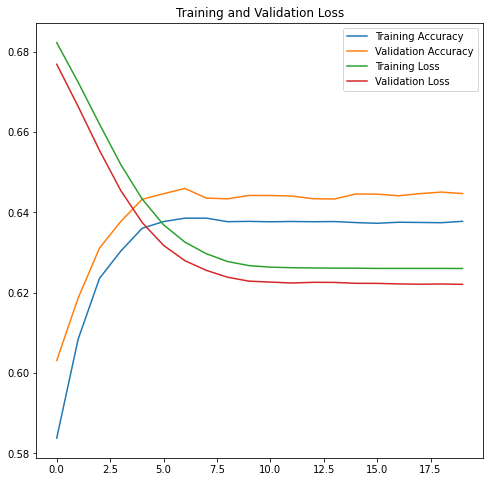

In [106]:
plt.figure(figsize=(8, 8))
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='upper left')
plt.title('Training and Validation Accuracy')

plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.savefig("plot after smote.pdf", dpi=100)
plt.show()

In [107]:
prediction_test = model.predict(xx_test)
prediction_test = np.rint(prediction_test)
prediction_test

array([[0.],
       [1.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32)

In [108]:
print(classification_report(yy_test, prediction_test))

              precision    recall  f1-score   support

           0       0.62      0.75      0.68     23686
           1       0.68      0.54      0.60     23377

    accuracy                           0.64     47063
   macro avg       0.65      0.64      0.64     47063
weighted avg       0.65      0.64      0.64     47063



In [109]:
confusion_matrix(yy_test, prediction_test ) # there is improvement as seen on the output of the confusion matrix

array([[17724,  5962],
       [10760, 12617]], dtype=int64)

In [110]:
model.save('./SGD20.h5')

## we test to use a hybrid of both oversampling and undersampling

In [111]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

In [112]:
# define oversampling strategy
over = RandomOverSampler(sampling_strategy=0.89)
# fit and apply the transform
X_o, y_o = over.fit_resample(X, y)

# define undersampling strategy
under = RandomUnderSampler(sampling_strategy=0.9)
# fit and apply the transform
Xu, yu = under.fit_resample(X_o, y_o)


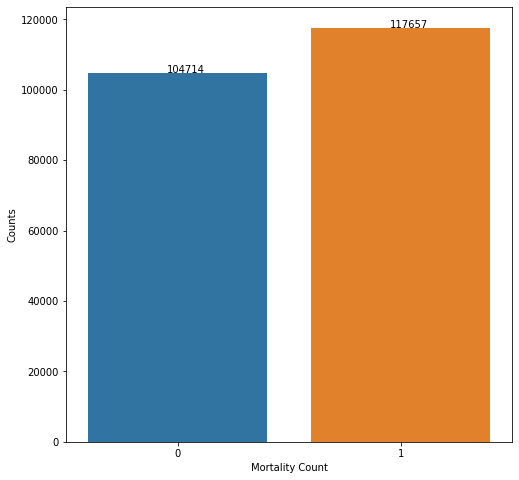

In [113]:
%matplotlib inline
plt.figure(figsize= (8,8))
labelss = sns.countplot(y_o)
plt.xlabel('Mortality Count')
plt.ylabel('Counts')
for p in labelss.patches:
   labelss.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.35, p.get_height()+0.05))
plt.show()

In [114]:
# We retest the simple model using the hybrid over-sampling and under-sampling
model = Sequential()
model.add(Dense(units= 3, activation='relu', input_shape=(3,)))

model.add(Dense(1, activation='sigmoid'))

In [115]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 3)                 12        
                                                                 
 dense_11 (Dense)            (None, 1)                 4         
                                                                 
Total params: 16
Trainable params: 16
Non-trainable params: 0
_________________________________________________________________


In [116]:
model.compile(loss='binary_crossentropy',
 optimizer='adam',
 metrics=['accuracy'])

In [117]:
xu_train, xu_test, yu_train, yu_test = train_test_split(Xu, yu, shuffle= True, test_size=0.20, random_state=42,)

In [118]:
%%time
history = model.fit(xu_train, yu_train,
                    batch_size = 128,
                    epochs= 20,
                    verbose=1,
                    validation_data=(xu_test, yu_test))
score = model.evaluate(xu_test, yu_test, verbose=1)

Epoch 1/20
1382/1382 [==============================] - 3s 2ms/step - loss: 0.6721 - accuracy: 0.6108 - val_loss: 0.6527 - val_accuracy: 0.6283
Epoch 2/20
1382/1382 [==============================] - 2s 2ms/step - loss: 0.6399 - accuracy: 0.6346 - val_loss: 0.6343 - val_accuracy: 0.6321
Epoch 3/20
1382/1382 [==============================] - 3s 2ms/step - loss: 0.6293 - accuracy: 0.6346 - val_loss: 0.6293 - val_accuracy: 0.6321
Epoch 4/20
1382/1382 [==============================] - 3s 2ms/step - loss: 0.6263 - accuracy: 0.6352 - val_loss: 0.6277 - val_accuracy: 0.6316
Epoch 5/20
1382/1382 [==============================] - 3s 2ms/step - loss: 0.6252 - accuracy: 0.6351 - val_loss: 0.6270 - val_accuracy: 0.6311
Epoch 6/20
1382/1382 [==============================] - 3s 2ms/step - loss: 0.6247 - accuracy: 0.6350 - val_loss: 0.6266 - val_accuracy: 0.6314
Epoch 7/20
1382/1382 [==============================] - 2s 2ms/step - loss: 0.6245 - accuracy: 0.6348 - val_loss: 0.6270 - val_accuracy:

In [119]:
# model is begining to learn
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.6265044212341309
Test accuracy: 0.6312848925590515


In [120]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = 20

epochs_range = range(epochs)

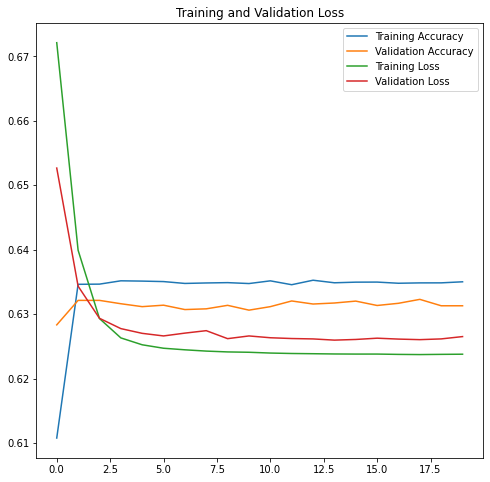

In [121]:
plt.figure(figsize=(8, 8))
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='upper left')
plt.title('Training and Validation Accuracy')

plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.savefig("hybrid_smote.pdf", dpi=100)
plt.show()

In [122]:
prediction_test = model.predict(xu_test)
prediction_test = np.rint(prediction_test)
prediction_test

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [1.],
       [1.]], dtype=float32)

In [123]:
print(classification_report(yu_test, prediction_test))

              precision    recall  f1-score   support

           0       0.59      0.69      0.64     20756
           1       0.68      0.58      0.62     23457

    accuracy                           0.63     44213
   macro avg       0.64      0.63      0.63     44213
weighted avg       0.64      0.63      0.63     44213



In [124]:
confusion_matrix(yu_test, prediction_test ) #with this techique the model does learn something!

array([[14370,  6386],
       [ 9916, 13541]], dtype=int64)

In [125]:
model.save('./Hybrid_oversample.h5')

## We experiment another Sampling method using Sklearn to Resample

In [126]:
del primary_df['Age Group']
print (primary_df['hospital_outcome_1alive_0dead'].value_counts())

1    117657
0     11735
Name: hospital_outcome_1alive_0dead, dtype: int64


In [127]:
# we attempt to upsample the minority and majority classes seperately
df_major = primary_df[primary_df['hospital_outcome_1alive_0dead']==1]
df_minor = primary_df[primary_df['hospital_outcome_1alive_0dead']==0]

In [128]:
df_min_upsampled = resample(df_minor, replace= True, n_samples = 117657, random_state= 42)

In [129]:
# both dataframes again
df_up = pd.concat([df_major, df_min_upsampled])
print(df_up['hospital_outcome_1alive_0dead'].value_counts())

1    117657
0    117657
Name: hospital_outcome_1alive_0dead, dtype: int64


In [130]:
# merge both dataframes again
df_up = pd.concat([df_major, df_min_upsampled])
print(df_up['hospital_outcome_1alive_0dead'].value_counts())

1    117657
0    117657
Name: hospital_outcome_1alive_0dead, dtype: int64


In [131]:
df_up.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 235314 entries, 0 to 115765
Data columns (total 4 columns):
 #   Column                         Non-Null Count   Dtype
---  ------                         --------------   -----
 0   age_years                      235314 non-null  int64
 1   sex_0male_1female              235314 non-null  int64
 2   episode_number                 235314 non-null  int64
 3   hospital_outcome_1alive_0dead  235314 non-null  int64
dtypes: int64(4)
memory usage: 9.0 MB


In [132]:
shuffle(df_up)

,age_years,sex_0male_1female,episode_number,hospital_outcome_1alive_0dead
87424,59,0,1,1
52832,84,1,1,0
56779,81,1,1,0
17147,65,1,2,1
39287,63,0,2,1
...,...,...,...,...
26761,80,0,4,0
66371,94,1,3,0
83795,54,1,1,1
38923,79,0,2,0


In [133]:
rx = df_up.drop(labels= ['hospital_outcome_1alive_0dead'], axis = 1)
ry = df_up['hospital_outcome_1alive_0dead'].values


In [134]:
# we then normalise the data again
nx = np.array(rx)
ny = np.array(ry)
ny.shape, nx.shape

((235314,), (235314, 3))

In [135]:
nx = scaler.fit_transform(nx)
nx.shape

(235314, 3)

In [136]:
nx_train, nx_test, ny_train, ny_test = train_test_split(nx, ny, shuffle= True, test_size=0.20, random_state=42,)

In [137]:
model = Sequential()
model.add(Dense(units= 3, activation='relu', input_shape=(3,)))

model.add(Dense(1, activation='sigmoid'))

In [138]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 3)                 12        
                                                                 
 dense_13 (Dense)            (None, 1)                 4         
                                                                 
Total params: 16
Trainable params: 16
Non-trainable params: 0
_________________________________________________________________


In [140]:
model.compile(loss='binary_crossentropy',
 optimizer='adam',
 metrics=['accuracy'])

In [141]:
%%time
history = model.fit(nx_train, ny_train,
                    batch_size = 128,
                    epochs= 20,
                    verbose=1,
                    validation_data=(nx_test, ny_test))
score = model.evaluate(nx_test, ny_test, verbose=1)

Epoch 1/20
1471/1471 [==============================] - 3s 2ms/step - loss: 0.6809 - accuracy: 0.5517 - val_loss: 0.6655 - val_accuracy: 0.5972
Epoch 2/20
1471/1471 [==============================] - 3s 2ms/step - loss: 0.6480 - accuracy: 0.6158 - val_loss: 0.6320 - val_accuracy: 0.6365
Epoch 3/20
1471/1471 [==============================] - 3s 2ms/step - loss: 0.6277 - accuracy: 0.6380 - val_loss: 0.6277 - val_accuracy: 0.6373
Epoch 4/20
1471/1471 [==============================] - 3s 2ms/step - loss: 0.6262 - accuracy: 0.6382 - val_loss: 0.6278 - val_accuracy: 0.6358
Epoch 5/20
1471/1471 [==============================] - 3s 2ms/step - loss: 0.6261 - accuracy: 0.6385 - val_loss: 0.6276 - val_accuracy: 0.6382
Epoch 6/20
1471/1471 [==============================] - 2s 2ms/step - loss: 0.6260 - accuracy: 0.6382 - val_loss: 0.6282 - val_accuracy: 0.6366
Epoch 7/20
1471/1471 [==============================] - 2s 2ms/step - loss: 0.6261 - accuracy: 0.6382 - val_loss: 0.6276 - val_accuracy:

In [142]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.6277168989181519
Test accuracy: 0.636551022529602


In [143]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = 20

epochs_range = range(epochs)

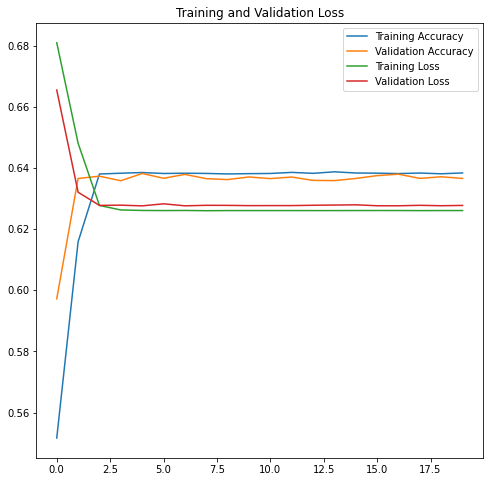

In [145]:
%matplotlib inline
plt.figure(figsize=(8, 8))
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='upper left')
plt.title('Training and Validation Accuracy')

plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.savefig("initial_model_using_sklearn.pdf", dpi=100)
plt.show()

In [146]:
prediction_test = model.predict(nx_test)
prediction_test = np.rint(prediction_test)
prediction_test

array([[1.],
       [1.],
       [0.],
       ...,
       [1.],
       [1.],
       [0.]], dtype=float32)

In [147]:
print(classification_report(ny_test, prediction_test))

              precision    recall  f1-score   support

           0       0.62      0.73      0.67     23703
           1       0.66      0.55      0.60     23360

    accuracy                           0.64     47063
   macro avg       0.64      0.64      0.63     47063
weighted avg       0.64      0.64      0.63     47063



In [148]:
confusion_matrix(ny_test, prediction_test )

array([[17213,  6490],
       [10615, 12745]], dtype=int64)

In [149]:
model.save('./Using_sklearn_resample.h5')

# We further investigate our model using the Hybrid resample for the sake of curiosity

In [158]:
model = Sequential()
model.add(Dense(units= 6, activation='relu', input_shape=(3,))) # double the number of neuron

model.add(Dense(1, activation='sigmoid'))

In [159]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 6)                 24        
                                                                 
 dense_17 (Dense)            (None, 1)                 7         
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [160]:
model.compile(loss='binary_crossentropy',
 optimizer= tf.keras.optimizers.Adam(learning_rate=0.0001), # reduced the learning rate
 metrics=['accuracy'])

In [161]:
xu_train, xu_test, yu_train, yu_test = train_test_split(Xu, yu, shuffle= True, test_size=0.20, random_state=42)

In [166]:
%%time
history = model.fit(xu_train, yu_train,
                    batch_size = 64,
                    epochs= 100,
                    verbose=1,
                    validation_data=(xu_test, yu_test))
score = model.evaluate(xu_test, yu_test, verbose=1)#increase the number of epochs to 100

Epoch 1/100
2764/2764 [==============================] - 5s 2ms/step - loss: 0.6348 - accuracy: 0.6346 - val_loss: 0.6345 - val_accuracy: 0.6296
Epoch 2/100
2764/2764 [==============================] - 5s 2ms/step - loss: 0.6314 - accuracy: 0.6350 - val_loss: 0.6318 - val_accuracy: 0.6302
Epoch 3/100
2764/2764 [==============================] - 5s 2ms/step - loss: 0.6290 - accuracy: 0.6352 - val_loss: 0.6299 - val_accuracy: 0.6310
Epoch 4/100
2764/2764 [==============================] - 5s 2ms/step - loss: 0.6272 - accuracy: 0.6355 - val_loss: 0.6285 - val_accuracy: 0.6317
Epoch 5/100
2764/2764 [==============================] - 5s 2ms/step - loss: 0.6260 - accuracy: 0.6357 - val_loss: 0.6276 - val_accuracy: 0.6313
Epoch 6/100
2764/2764 [==============================] - 5s 2ms/step - loss: 0.6251 - accuracy: 0.6353 - val_loss: 0.6268 - val_accuracy: 0.6313
Epoch 7/100
2764/2764 [==============================] - 5s 2ms/step - loss: 0.6245 - accuracy: 0.6354 - val_loss: 0.6264 - val_ac

Epoch 57/100
2764/2764 [==============================] - 4s 1ms/step - loss: 0.6218 - accuracy: 0.6360 - val_loss: 0.6246 - val_accuracy: 0.6333
Epoch 58/100
2764/2764 [==============================] - 4s 2ms/step - loss: 0.6218 - accuracy: 0.6361 - val_loss: 0.6246 - val_accuracy: 0.6324
Epoch 59/100
2764/2764 [==============================] - 4s 1ms/step - loss: 0.6218 - accuracy: 0.6362 - val_loss: 0.6247 - val_accuracy: 0.6324
Epoch 60/100
2764/2764 [==============================] - 4s 2ms/step - loss: 0.6218 - accuracy: 0.6362 - val_loss: 0.6245 - val_accuracy: 0.6329
Epoch 61/100
2764/2764 [==============================] - 4s 2ms/step - loss: 0.6218 - accuracy: 0.6362 - val_loss: 0.6245 - val_accuracy: 0.6329
Epoch 62/100
2764/2764 [==============================] - 5s 2ms/step - loss: 0.6218 - accuracy: 0.6361 - val_loss: 0.6245 - val_accuracy: 0.6329
Epoch 63/100
2764/2764 [==============================] - 4s 2ms/step - loss: 0.6218 - accuracy: 0.6361 - val_loss: 0.6246 -

In [167]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.6245425939559937
Test accuracy: 0.6318729519844055


In [168]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = 100

epochs_range = range(epochs)

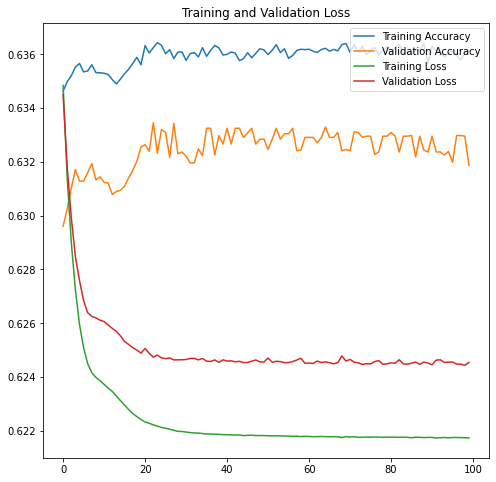

In [169]:
%matplotlib inline
plt.figure(figsize=(8, 8))
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='upper left')
plt.title('Training and Validation Accuracy')

plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.savefig("2nd_model_using_hybrid.pdf", dpi=100)
plt.show()

In [170]:
prediction_test = model.predict(xu_test) # when I reduced the batch size, there was increased variance between the training and accuracy d
prediction_test = np.rint(prediction_test)
prediction_test

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [1.],
       [1.]], dtype=float32)

In [171]:
print(classification_report(yu_test, prediction_test))

              precision    recall  f1-score   support

           0       0.59      0.71      0.64     20756
           1       0.69      0.56      0.62     23457

    accuracy                           0.63     44213
   macro avg       0.64      0.64      0.63     44213
weighted avg       0.64      0.63      0.63     44213



In [172]:
confusion_matrix(yu_test, prediction_test )

array([[14731,  6025],
       [10251, 13206]], dtype=int64)

In [173]:
model.save('./Assignment/hybrid2.h5')

# 4th Architecture

In [174]:
model = Sequential()
model.add(Dense(units=3, activation='relu', input_shape=(3,)))


model.add(Dense(units= 6, activation= 'relu'))


model.add(Dense(1, activation='sigmoid'))

In [175]:
model.compile(loss='binary_crossentropy',
 optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
 metrics=['accuracy'])

In [176]:
xu_train, xu_test, yu_train, yu_test = train_test_split(Xu, yu, shuffle= True, test_size=0.10, random_state=42)

In [177]:
%%time
history = model.fit(xu_train, yu_train,
                    batch_size = 256,
                    epochs= 50,
                    verbose=1,
                    validation_data=(xu_test, yu_test))
score = model.evaluate(xu_test, yu_test, verbose=1)

Epoch 1/50
778/778 [==============================] - 2s 2ms/step - loss: 0.6892 - accuracy: 0.5460 - val_loss: 0.6874 - val_accuracy: 0.5463
Epoch 2/50
778/778 [==============================] - 1s 2ms/step - loss: 0.6848 - accuracy: 0.5580 - val_loss: 0.6833 - val_accuracy: 0.5591
Epoch 3/50
778/778 [==============================] - 1s 2ms/step - loss: 0.6805 - accuracy: 0.5680 - val_loss: 0.6790 - val_accuracy: 0.5692
Epoch 4/50
778/778 [==============================] - 1s 2ms/step - loss: 0.6761 - accuracy: 0.5756 - val_loss: 0.6748 - val_accuracy: 0.5750
Epoch 5/50
778/778 [==============================] - 1s 2ms/step - loss: 0.6716 - accuracy: 0.5817 - val_loss: 0.6704 - val_accuracy: 0.5797
Epoch 6/50
778/778 [==============================] - 1s 2ms/step - loss: 0.6670 - accuracy: 0.5882 - val_loss: 0.6658 - val_accuracy: 0.5847
Epoch 7/50
778/778 [==============================] - 1s 2ms/step - loss: 0.6622 - accuracy: 0.5951 - val_loss: 0.6611 - val_accuracy: 0.5934
Epoch 

In [178]:
score = model.evaluate(xu_test, yu_test, verbose=1)

691/691 [==============================] - 1s 1ms/step - loss: 0.6265 - accuracy: 0.6296


In [179]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.6264832615852356
Test accuracy: 0.6295743584632874


In [180]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = 50

epochs_range = range(epochs)

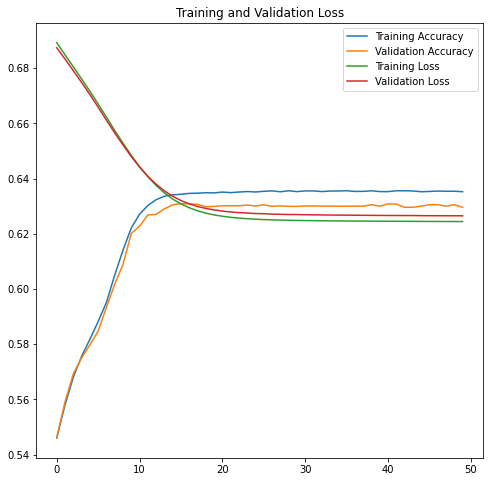

In [181]:
plt.figure(figsize=(8, 8))
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='upper left')
plt.title('Training and Validation Accuracy')

plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.savefig("4th Architecture", dpi=100)
plt.show()

In [182]:

plot_model(model, to_file='2nd_model.png', show_shapes=True, show_layer_names=True) # model architecture

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


In [183]:
prediction_test = model.predict(xu_test) # when I reduced the batch size, there was increased variance between the training and accuracy d
prediction_test = np.rint(prediction_test)
prediction_test

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [1.]], dtype=float32)

In [184]:
print(classification_report(yu_test, prediction_test))

              precision    recall  f1-score   support

           0       0.60      0.67      0.63     10488
           1       0.67      0.59      0.63     11619

    accuracy                           0.63     22107
   macro avg       0.63      0.63      0.63     22107
weighted avg       0.63      0.63      0.63     22107



In [83]:
np.random.seed(42)

# Hyperparameter Optimization using Grid Search

In [84]:
x_grid, x_notusedt, y_grid, y_notused = train_test_split(Xtrain_een, ytrain_een, shuffle= True, test_size=0.99, random_state=42)

In [187]:
def opt_model(init_weights = 'uniform', momentum = 0.1, lr_rate = 0.01, neurons = 3 ,neurons1 =6, nclass =1, dpt_rate = 0.0, weight_constraint = 0):
  model = Sequential() 
  model.add(Dense(units= neurons, activation='relu', kernel_initializer= init_weights, input_shape=(3,), kernel_constraint= maxnorm(weight_constraint)))
  model.add(Dense(units= neurons1))
  model.add(Dropout(dpt_rate))
  model.add(Dense(nclass, kernel_initializer= init_weights, activation='sigmoid'))
  optimizer = SGD(lr=lr_rate, momentum=momentum)
  model.compile(loss='binary_crossentropy', optimizer= optimizer, metrics=['accuracy'])

  return model




In [188]:
from keras.wrappers.scikit_learn import KerasClassifier


In [189]:
optk_model = KerasClassifier(build_fn= opt_model,  verbose=1)

lr_rate = [0.01, 0.00005, 0.0001, 0.001]
momentum = [0.1, 0.3, 0.5]
dpt_rate = [0.0, 0.2]
optimizer = ['SGD', 'adam']
neurons = [3, 6,24]
neurons1 = [6,9]
init_weights = ['uniform', 'normal', 'he_uniform']
weight_constraint = [0,1,2]
epochs = [100,200]
batch_size = [32,64,128]
nclass = [1]


In [190]:
param_grid = dict(lr_rate = lr_rate, momentum= momentum, dpt_rate = dpt_rate, neurons = neurons, neurons1 = neurons1, init_weights = init_weights, weight_constraint = weight_constraint, epochs = epochs, batch_size = batch_size, nclass = nclass)

grid = GridSearchCV(estimator=optk_model, param_grid= param_grid, n_jobs= 2, cv=3)

In [191]:
%%time
grid_result = grid.fit(x_grid, y_grid)

Epoch 1/100
37/37 [==============================] - 1s 3ms/step - loss: 0.7334 - accuracy: 0.4815
Epoch 2/100
37/37 [==============================] - 0s 2ms/step - loss: 0.7178 - accuracy: 0.5002
Epoch 3/100
37/37 [==============================] - 0s 2ms/step - loss: 0.7111 - accuracy: 0.5087
Epoch 4/100
37/37 [==============================] - 0s 2ms/step - loss: 0.7025 - accuracy: 0.5249
Epoch 5/100
37/37 [==============================] - 0s 2ms/step - loss: 0.7116 - accuracy: 0.5091
Epoch 6/100
37/37 [==============================] - 0s 2ms/step - loss: 0.7032 - accuracy: 0.5283
Epoch 7/100
37/37 [==============================] - 0s 2ms/step - loss: 0.7036 - accuracy: 0.5159
Epoch 8/100
37/37 [==============================] - 0s 2ms/step - loss: 0.6941 - accuracy: 0.5410
Epoch 9/100
37/37 [==============================] - 0s 2ms/step - loss: 0.6998 - accuracy: 0.5317
Epoch 10/100
37/37 [==============================] - 0s 2ms/step - loss: 0.6991 - accuracy: 0.5266
Epoch 11/

37/37 [==============================] - 0s 1ms/step - loss: 0.6473 - accuracy: 0.6320
Epoch 84/100
37/37 [==============================] - 0s 2ms/step - loss: 0.6489 - accuracy: 0.6286
Epoch 85/100
37/37 [==============================] - 0s 2ms/step - loss: 0.6461 - accuracy: 0.6247
Epoch 86/100
37/37 [==============================] - 0s 1ms/step - loss: 0.6463 - accuracy: 0.6226
Epoch 87/100
37/37 [==============================] - 0s 2ms/step - loss: 0.6464 - accuracy: 0.6264
Epoch 88/100
37/37 [==============================] - 0s 2ms/step - loss: 0.6463 - accuracy: 0.6286
Epoch 89/100
37/37 [==============================] - 0s 2ms/step - loss: 0.6458 - accuracy: 0.6315
Epoch 90/100
37/37 [==============================] - 0s 2ms/step - loss: 0.6436 - accuracy: 0.6294
Epoch 91/100
37/37 [==============================] - 0s 2ms/step - loss: 0.6486 - accuracy: 0.6192
Epoch 92/100
37/37 [==============================] - 0s 2ms/step - loss: 0.6415 - accuracy: 0.6354
Epoch 93/100


In [192]:
print("Best: %f using %s" %(grid_result.best_score_ , grid_result.best_params_))

Best: 0.647678 using {'batch_size': 64, 'dpt_rate': 0.2, 'epochs': 100, 'init_weights': 'he_uniform', 'lr_rate': 0.01, 'momentum': 0.1, 'nclass': 1, 'neurons': 6, 'neurons1': 9, 'weight_constraint': 2}


# Hyperparameter Optimization using Random Search

In [194]:
ropt = RandomizedSearchCV(estimator= optk_model, param_distributions= param_grid, n_jobs= 2, cv = 3)

In [195]:
%%time
ropt_result = ropt.fit(x_grid, y_grid)

Epoch 1/200
19/19 [==============================] - 1s 2ms/step - loss: 0.7061 - accuracy: 0.5104
Epoch 2/200
19/19 [==============================] - 0s 2ms/step - loss: 0.6942 - accuracy: 0.5257
Epoch 3/200
19/19 [==============================] - 0s 2ms/step - loss: 0.6878 - accuracy: 0.5389
Epoch 4/200
19/19 [==============================] - 0s 2ms/step - loss: 0.6838 - accuracy: 0.5482
Epoch 5/200
19/19 [==============================] - 0s 2ms/step - loss: 0.6812 - accuracy: 0.5525
Epoch 6/200
19/19 [==============================] - 0s 2ms/step - loss: 0.6796 - accuracy: 0.5597
Epoch 7/200
19/19 [==============================] - 0s 2ms/step - loss: 0.6786 - accuracy: 0.5648
Epoch 8/200
19/19 [==============================] - 0s 2ms/step - loss: 0.6778 - accuracy: 0.5699
Epoch 9/200
19/19 [==============================] - 0s 2ms/step - loss: 0.6773 - accuracy: 0.5750
Epoch 10/200
19/19 [==============================] - 0s 2ms/step - loss: 0.6768 - accuracy: 0.5822
Epoch 11/

19/19 [==============================] - 0s 2ms/step - loss: 0.6429 - accuracy: 0.6422
Epoch 164/200
19/19 [==============================] - 0s 2ms/step - loss: 0.6427 - accuracy: 0.6422
Epoch 165/200
19/19 [==============================] - 0s 2ms/step - loss: 0.6425 - accuracy: 0.6439
Epoch 166/200
19/19 [==============================] - 0s 2ms/step - loss: 0.6424 - accuracy: 0.6422
Epoch 167/200
19/19 [==============================] - 0s 1ms/step - loss: 0.6422 - accuracy: 0.6439
Epoch 168/200
19/19 [==============================] - 0s 1ms/step - loss: 0.6421 - accuracy: 0.6451
Epoch 169/200
19/19 [==============================] - 0s 1ms/step - loss: 0.6420 - accuracy: 0.6417
Epoch 170/200
19/19 [==============================] - 0s 1ms/step - loss: 0.6418 - accuracy: 0.6426
Epoch 171/200
19/19 [==============================] - 0s 1ms/step - loss: 0.6417 - accuracy: 0.6460
Epoch 172/200
19/19 [==============================] - 0s 2ms/step - loss: 0.6415 - accuracy: 0.6447
Epoc

In [196]:
print("Best: %f using %s" %(ropt_result.best_score_ , ropt_result.best_params_))

Best: 0.631953 using {'weight_constraint': 1, 'neurons1': 6, 'neurons': 3, 'nclass': 1, 'momentum': 0.1, 'lr_rate': 0.01, 'init_weights': 'he_uniform', 'epochs': 200, 'dpt_rate': 0.0, 'batch_size': 128}


In [97]:
#Model using the best parameters of the Grid Search Feeedforward NeuralNet
final_model = Sequential()


final_model.add(Dense(units=6, activation='relu', kernel_initializer= 'he_uniform', input_shape=(3,),kernel_constraint= maxnorm(2)))


final_model.add(Dense(units=9, activation= 'relu'))

final_model.add(Dropout(0.2))
final_model.add(Dense(1,kernel_initializer= 'he_uniform', activation='sigmoid'))


In [98]:
final_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 6)                 24        
                                                                 
 dense_7 (Dense)             (None, 9)                 63        
                                                                 
 dropout_2 (Dropout)         (None, 9)                 0         
                                                                 
 dense_8 (Dense)             (None, 1)                 10        
                                                                 
Total params: 97
Trainable params: 97
Non-trainable params: 0
_________________________________________________________________


In [99]:
xx_train, xx_test, yy_train, yy_test = train_test_split(Xtrain_een, ytrain_een, shuffle= True, test_size=0.20, random_state=42)

In [100]:
optimizer = SGD(lr= 0.01, momentum=0.1)
final_model.compile(loss='binary_crossentropy', optimizer= optimizer, metrics=['accuracy'])

In [101]:
%%time
history = final_model.fit(xx_train, yy_train,
                    batch_size = 64,
                    epochs= 100,
                    verbose=1,
                    validation_data=(xx_test, yy_test))
score = final_model.evaluate(xx_test, yy_test, verbose=1)

Epoch 1/100
2942/2942 [==============================] - 11s 3ms/step - loss: 0.6650 - accuracy: 0.5913 - val_loss: 0.6395 - val_accuracy: 0.6368
Epoch 2/100
2942/2942 [==============================] - 10s 4ms/step - loss: 0.6397 - accuracy: 0.6266 - val_loss: 0.6253 - val_accuracy: 0.6454
Epoch 3/100
2942/2942 [==============================] - 9s 3ms/step - loss: 0.6351 - accuracy: 0.6296 - val_loss: 0.6234 - val_accuracy: 0.6451
Epoch 4/100
2942/2942 [==============================] - 10s 3ms/step - loss: 0.6323 - accuracy: 0.6321 - val_loss: 0.6217 - val_accuracy: 0.6433
Epoch 5/100
2942/2942 [==============================] - 10s 3ms/step - loss: 0.6317 - accuracy: 0.6319 - val_loss: 0.6219 - val_accuracy: 0.6435
Epoch 6/100
2942/2942 [==============================] - 12s 4ms/step - loss: 0.6313 - accuracy: 0.6336 - val_loss: 0.6213 - val_accuracy: 0.6442
Epoch 7/100
2942/2942 [==============================] - 10s 3ms/step - loss: 0.6305 - accuracy: 0.6336 - val_loss: 0.6216 - 

2942/2942 [==============================] - 9s 3ms/step - loss: 0.6268 - accuracy: 0.6375 - val_loss: 0.6200 - val_accuracy: 0.6451
Epoch 58/100
2942/2942 [==============================] - 9s 3ms/step - loss: 0.6270 - accuracy: 0.6376 - val_loss: 0.6196 - val_accuracy: 0.6452
Epoch 59/100
2942/2942 [==============================] - 9s 3ms/step - loss: 0.6270 - accuracy: 0.6369 - val_loss: 0.6195 - val_accuracy: 0.6446
Epoch 60/100
2942/2942 [==============================] - 8s 3ms/step - loss: 0.6266 - accuracy: 0.6380 - val_loss: 0.6202 - val_accuracy: 0.6440
Epoch 61/100
2942/2942 [==============================] - 10s 3ms/step - loss: 0.6263 - accuracy: 0.6370 - val_loss: 0.6199 - val_accuracy: 0.6453
Epoch 62/100
2942/2942 [==============================] - 10s 3ms/step - loss: 0.6267 - accuracy: 0.6372 - val_loss: 0.6195 - val_accuracy: 0.6447
Epoch 63/100
2942/2942 [==============================] - 9s 3ms/step - loss: 0.6264 - accuracy: 0.6374 - val_loss: 0.6193 - val_accura

In [102]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.6191946864128113
Test accuracy: 0.6448377966880798


In [103]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = 100

epochs_range = range(epochs)

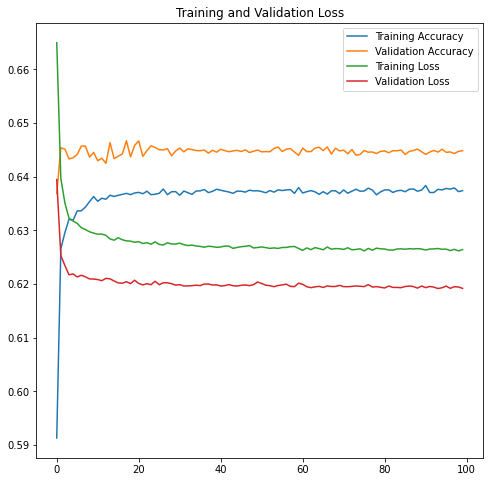

In [104]:
plt.figure(figsize=(8, 8))
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='upper left')
plt.title('Training and Validation Accuracy')

plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.savefig("Final_plot", dpi=100)
plt.show()

In [105]:
final_prediction_test = final_model.predict(xx_test)
final_prediction_test = np.rint(final_prediction_test)
final_prediction_test

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32)

In [106]:
print(classification_report(yy_test, final_prediction_test))

              precision    recall  f1-score   support

           0       0.62      0.78      0.69     23686
           1       0.70      0.51      0.59     23377

    accuracy                           0.64     47063
   macro avg       0.66      0.64      0.64     47063
weighted avg       0.66      0.64      0.64     47063



# Using Logistic Regression


In [226]:
from sklearn.linear_model import LogisticRegression

In [227]:
log_model = LogisticRegression()

In [228]:
%%time
log_predict = log_model.fit(xx_train,yy_train).predict(xx_test)

Wall time: 1.39 s


In [229]:
log_model_acc = round(accuracy_score(yy_test,log_predict)*100,2)

In [230]:
logistic_mat = confusion_matrix(yy_test,log_predict)

In [231]:
logistic_mat

array([[17422,  6264],
       [10477, 12900]], dtype=int64)

In [232]:
log_model_acc

64.43

 # Using Decision Tree Classifier

In [85]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [86]:
    decision_model = DecisionTreeClassifier(criterion = 'gini')

In [251]:
%%time
decision_model.fit(xx_train,yy_train)

Wall time: 298 ms


DecisionTreeClassifier()

In [236]:
%%time
decision_pred = decision_model.predict(xx_test)

Wall time: 8.98 ms


In [237]:
acc_decision = decision_model.score
acc_decision

<bound method ClassifierMixin.score of DecisionTreeClassifier()>

In [238]:
dec_model_acc = round(accuracy_score(yy_test, decision_pred)*100,2)
dec_model_acc

66.27

In [239]:
decc_mat = confusion_matrix(yy_test,decision_pred)
decc_mat

array([[19124,  4562],
       [11314, 12063]], dtype=int64)

In [87]:
# Hyper-parameter tunning 
param_grid = {'max_features': ['auto', 'sqrt', ],
'min_samples_split': [2,3],
'min_samples_leaf':[2,3,4] }




# Implement GridSearchCV
decision_gsc = GridSearchCV(decision_model, param_grid, cv=3) # For 3 Cross-Validation



decision_gsc.fit(x_grid, y_grid) # Model Fitting



print("\n Best Score is ")



print(decision_gsc.best_score_)



print("\n Best Estimator is ")
print(decision_gsc.best_estimator_)



print("\n Best Parametes are")
print(decision_gsc.best_params_)


 Best Score is 
0.6183554313445123

 Best Estinator is 
DecisionTreeClassifier(max_features='auto', min_samples_leaf=3)

 Best Parametes are
{'max_features': 'auto', 'min_samples_leaf': 3, 'min_samples_split': 2}


 # Using Support Vector Machines

In [240]:
from sklearn.svm import SVC

In [241]:
my_svc = SVC(kernel = 'linear', random_state= 0)

In [242]:
%%time
my_svc.fit(xx_train, yy_train)

SVC(kernel='linear', random_state=0)

In [243]:
%%time
svm_predictions = my_svc.predict(xx_test)

Wall time: 2min 33s


In [244]:
svc_acc = accuracy_score(yy_test,svm_predictions)
print(svc_acc)

0.6418842827699042


In [245]:
svm_mat = confusion_matrix(yy_test,svm_predictions)

# Using Naive Bayes Classifier

In [253]:
from sklearn.naive_bayes import GaussianNB

In [254]:
n_classifier = GaussianNB()

In [255]:
%%time
n_classifier.fit(xx_train, yy_train)

Wall time: 59.8 ms


GaussianNB()

In [256]:
n_class_predict = n_classifier.predict(xx_test)

In [257]:
n_acc = accuracy_score(yy_test,n_class_predict)
print(n_acc)

0.6340437286190851


### REFERENCES

##### https://www.kaggle.com/code/maxskoryk/sepsis-prediction-from-clinical-data#1.-Exploratory-Data-Analysis
#### Keras and Simple Classification SG | Kaggl
#### https://www.kaggle.com/code/binitagiri/hackathon-1feb2022
#### https://www.geeksforgeeks.org/sklearn-binarizer-in-python/
#### https://www.analyticsvidhya.com/blog/2021/05/tuning-the-hyperparameters-and-layers-of-neural-network-deep-learning/
#### https://towardsdatascience.com/designing-your-neural-networks-a5e4617027ed
#### https://machinelearningmastery.com/grid-search-hyperparameters-deep-learning-models-python-keras/